In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
#load data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

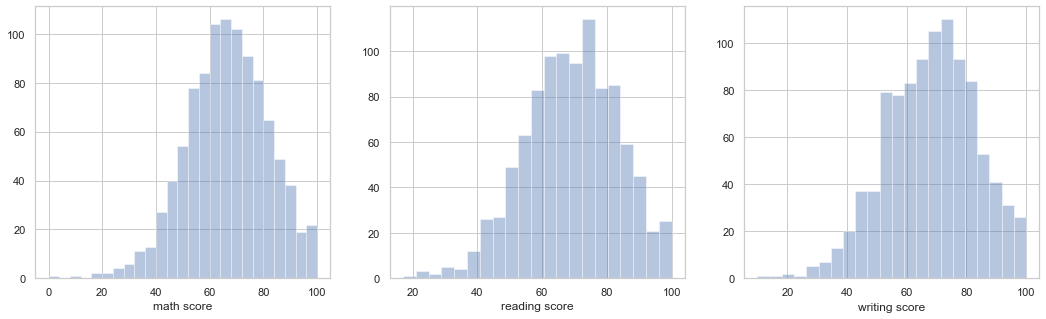

In [3]:
#plot exam score variables
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.distplot(student_df['math score'], kde = False)

plt.subplot(1, 3, 2)
sns.distplot(student_df['reading score'], kde = False)

plt.subplot(1, 3, 3)
sns.distplot(student_df['writing score'], kde = False)

plt.show()

In [4]:
#test for normality
jb_stats = jarque_bera(np.sqrt(student_df['math score']))
norm_stats = normaltest(np.sqrt(student_df['math score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(student_df['reading score']))
norm_stats = normaltest(np.sqrt(student_df['reading score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(student_df['writing score']))
norm_stats = normaltest(np.sqrt(student_df['writing score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22


None of the exam score variables are normal, so I performed a Box-Cox transformation.

In [5]:
#perform Box-Cox transformation
math_score_boxcox,_ = boxcox(student_df[student_df['math score']>0]['math score'])
reading_score_boxcox,_ = boxcox(student_df['reading score'])
writing_score_boxcox,_ = boxcox(student_df['writing score'])

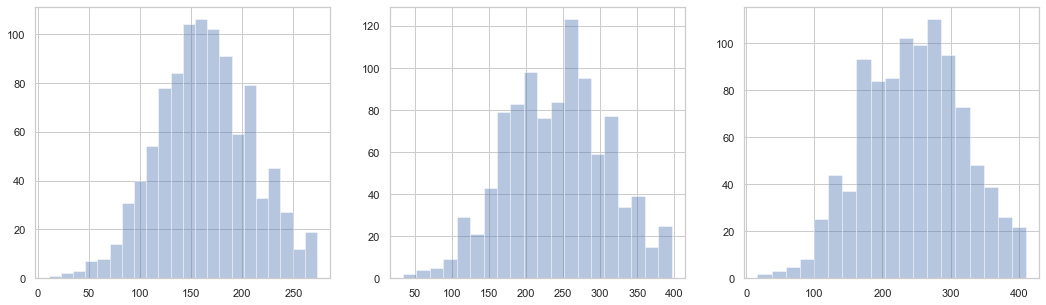

In [6]:
#show distributions of transformed variables
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.distplot(math_score_boxcox, kde = False)

plt.subplot(1, 3, 2)
sns.distplot(reading_score_boxcox, kde = False)

plt.subplot(1, 3, 3)
sns.distplot(writing_score_boxcox, kde = False)

plt.show()

In [7]:
#check for normality
jb_stats = jarque_bera(np.sqrt(student_df['math score']))
norm_stats = normaltest(np.sqrt(student_df['math score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(reading_score_boxcox))
norm_stats = normaltest(np.sqrt(reading_score_boxcox))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(writing_score_boxcox))
norm_stats = normaltest(np.sqrt(writing_score_boxcox))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 44.405379757095474 and p value is 2.2776880381769615e-10
Normality test statistics is 40.268958925865235 and p value is 1.8018003761773026e-09
Jarque-Bera test statistics is 61.579024592465814 and p value is 4.2521541843143495e-14
Normality test statistics is 52.72079004996425 and p value is 3.5630826779611096e-12


The variables are still not normally distributed, but they have shifted closer to a normal distribution.

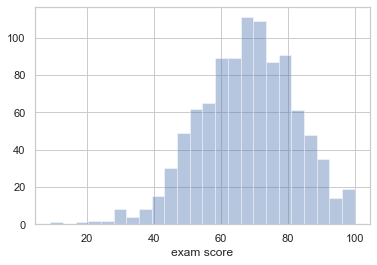

In [8]:
#define combined exam score variable and plot distribution
student_df['exam score'] = (student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3
sns.distplot(student_df['exam score'], kde = False)
plt.show()

In [9]:
#check normality
jb_stats = jarque_bera(np.sqrt(student_df['exam score']))
norm_stats = normaltest(np.sqrt(student_df['exam score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 187.7135523631838 and p value is 0.0
Normality test statistics is 112.45120523523005 and p value is 3.8153206356096583e-25


In [10]:
#perform Box-Cox transformation and check for normality
exam_score_boxcox,_ = boxcox(student_df['exam score'])
jb_stats = jarque_bera(np.sqrt(exam_score_boxcox))
norm_stats = normaltest(np.sqrt(exam_score_boxcox))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 72.98499270348914 and p value is 1.1102230246251565e-16
Normality test statistics is 58.419283633093585 and p value is 2.0625939555099964e-13


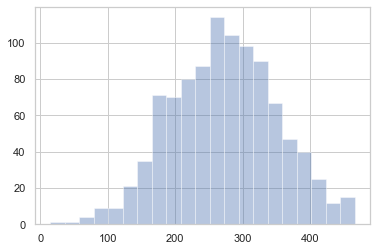

In [11]:
#show distribution after transformation
sns.distplot(exam_score_boxcox, kde = False)
plt.show()

The combined exam score was not normal, but after performing the Box-Cox transformation, it is much closer to being normal.

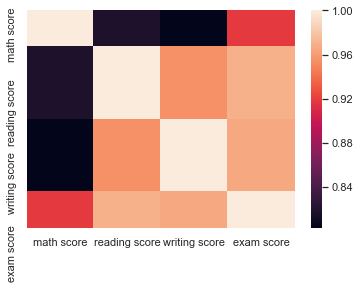

In [12]:
#show heatmap of variables
sns.heatmap(student_df.corr())
plt.show()

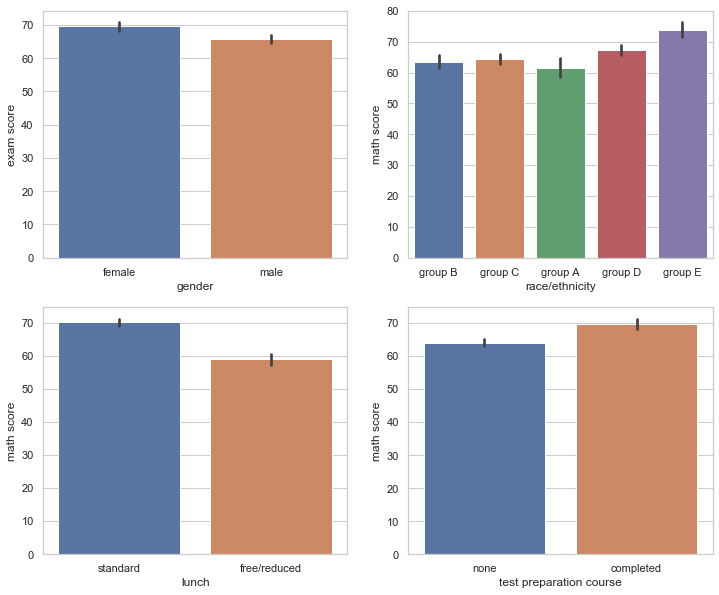

In [13]:
#plot exam score by other variables
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.barplot(student_df['gender'], student_df['exam score'])
plt.subplot(2, 2, 2)
sns.barplot(student_df['race/ethnicity'], student_df['math score'])
plt.subplot(2, 2, 3)
sns.barplot(student_df['lunch'], student_df['math score'])
plt.subplot(2, 2, 4)
sns.barplot(student_df['test preparation course'], student_df['math score'])
plt.show()

Based on the heatmap, the individual score that has the highest correlation with the average exam score is the reading score. Based on the bar plots, the variable that shows the largest difference in exam score between groups is lunch.